# Cardiovascular Risks Project

Régression logistique.

## SOMMAIRE

### 1. Libraries and Dataset Import

### 2. Data Exploration

### 3. Data Preprocessing

### 4. Logistic Regression (preset model)

### 5. Logistic Regression (custom model)

## 1. Libraries and Dataset Import

### Librairies import

In [1]:
#Data import & Exploring
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data processing
from sklearn.model_selection import train_test_split

#Data Analysis
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Custom
from custom_class import *
from custom_functions import *

### Dataset Import

In [2]:
cardio_data = pd.read_csv('cardio_train.csv', sep = ';')
cardio_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Premier aperçu des donnés.

## 2. Data Exploration

### Nombre et type de données des colonnes

In [3]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Le jeu de données est composé de :
- 13 colonnes
- 70000 observations
- types integer / float

### Vérification des valeurs nulles

In [4]:
cardio_data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Le jeu de données ne contient pas de valeurs nulles.

### Représentation des catégories des données du target

Text(0.5, 1.0, 'Catégories du TARGET')

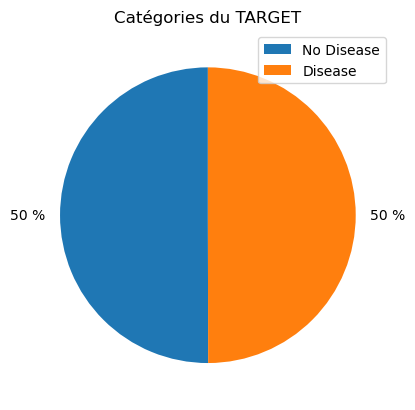

In [5]:
labels = [0, 1]
count = [cardio_data.cardio.value_counts()[labels[0]], cardio_data.cardio.value_counts()[labels[1]]]
perc = [count[0] / (count[0] + count[1]), count[1] / (count[0] + count[1])]

data = [perc[0], perc[1]]

plt.pie(data, startangle = 90, labels = [str(round(perc[0] * 100)) + ' %' , str(round(perc[1] * 100)) + ' %'])
plt.legend(['No Disease', 'Disease'])
plt.title("Catégories du TARGET")

Les données target sont bien équilibrées.

### Les facteurs non modifiables

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'weight'}>, <AxesSubplot:>]],
      dtype=object)

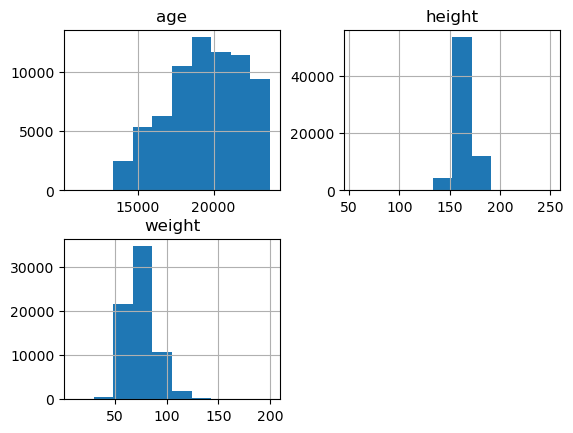

In [6]:
cardio_data[['age', 'height', 'weight']].hist()

On peut observer la distribution des âges (en jours), des tailles et des poids.

Les distributions semblent cohérentes.

#### Focus sur l'âge

In [7]:
age_year = cardio_data.age / 365

Text(0, 0.5, 'Nombre de patients')

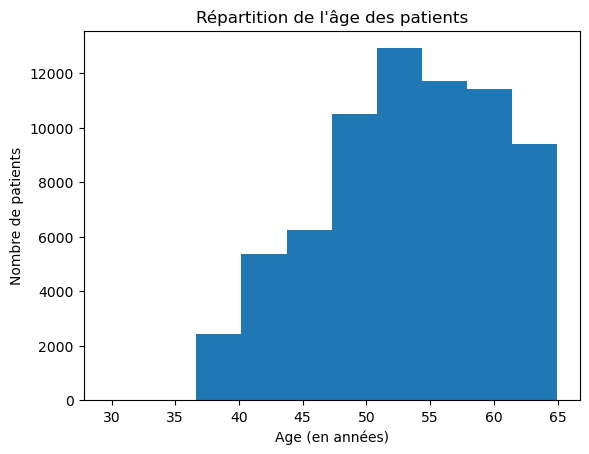

In [8]:
age_year.hist(grid=False)

plt.title("Répartition de l'âge des patients")
plt.xlabel('Age (en années)')
plt.ylabel('Nombre de patients')

On peut observer la distribution des âges en années.

La distribution semble cohérente.

#### Focus sur la taille

Text(0, 0.5, 'Taille du patient (cm)')

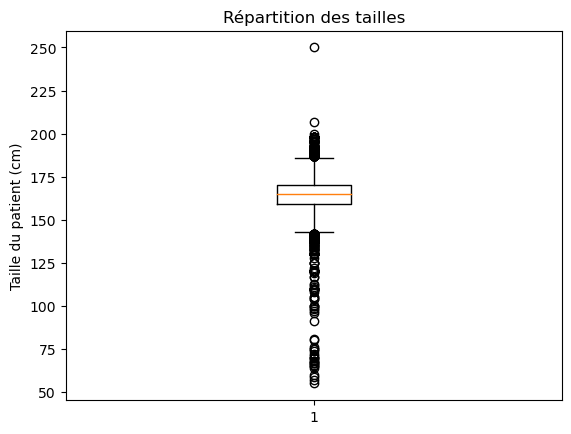

In [9]:
plt.boxplot(data=cardio_data, x='height')
plt.title('Répartition des tailles')
plt.ylabel('Taille du patient (cm)')

Certaines données de taille semblent anormalement basses et une semble anormalement haute.

#### Focus sur le poids

Text(0, 0.5, 'Poids du patient (kg)')

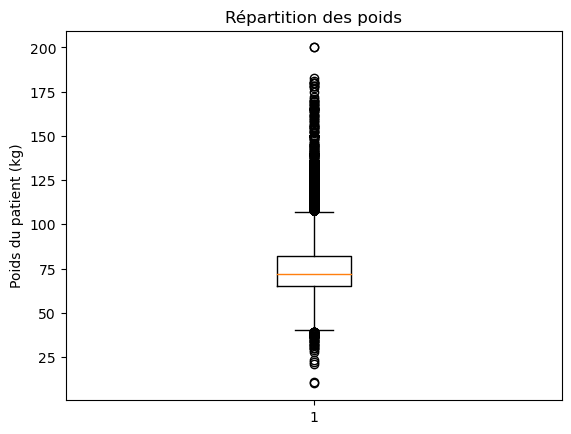

In [10]:
plt.boxplot(data=cardio_data, x='weight')
plt.title('Répartition des poids')
plt.ylabel('Poids du patient (kg)')

Certaines données de poids semblent anormalement basses.

#### Focus sur le genre

Text(0.5, 1.0, 'Répartition des genres des patients')

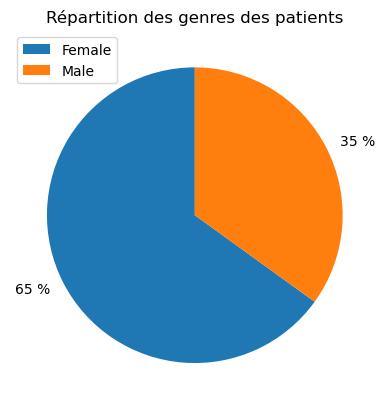

In [11]:
labels = [1, 2]
count = [cardio_data.gender.value_counts()[labels[0]], cardio_data.gender.value_counts()[labels[1]]]
perc = [count[0] / (count[0] + count[1]), count[1] / (count[0] + count[1])]

data = [perc[0], perc[1]]

plt.pie(data, startangle = 90, labels = [str(round(perc[0] * 100)) + ' %' , str(round(perc[1] * 100)) + ' %'])
plt.legend(['Female', 'Male'])
plt.title("Répartition des genres des patients")

On peut observer une majorité de patients féminins.

### Les facteurs liés au mode de vie

array([[<AxesSubplot:title={'center':'smoke'}>,
        <AxesSubplot:title={'center':'alco'}>],
       [<AxesSubplot:title={'center':'active'}>, <AxesSubplot:>]],
      dtype=object)

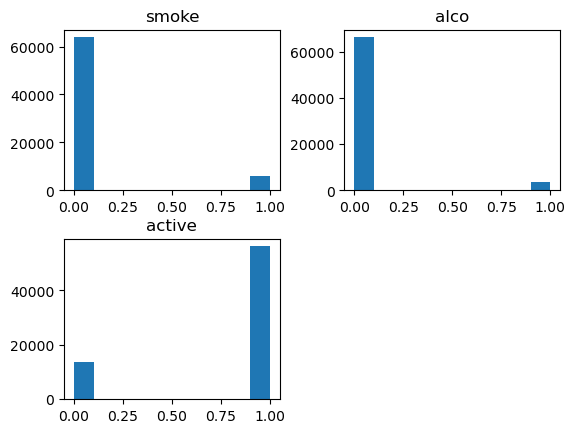

In [12]:
cardio_data[['smoke', 'alco', 'active']].hist(grid = False)

La répartition semble cohérente.

Majorité de personnes non-fumeur, sans consommation excessive d’alcool et active.

### Les facteurs cliniques (aval)

array([[<AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'gluc'}>]], dtype=object)

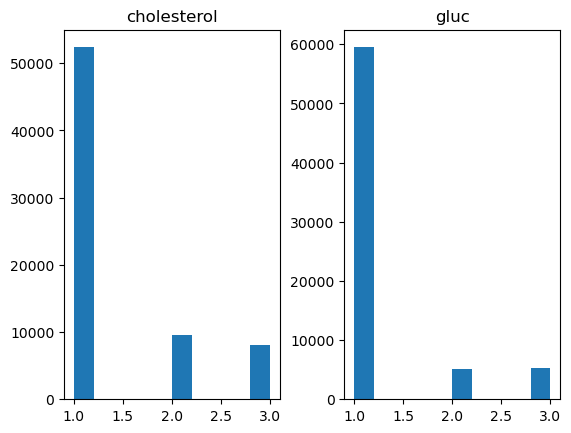

In [13]:
cardio_data[['cholesterol', 'gluc']].hist(grid = False)

La répartition semble cohérente.

Majorité de personnes sans cholestérol et avec une glycémie normale.

### Visualisation des données de tension sanguine

Text(0, 0.5, 'Tension sanguine (mm Hg)')

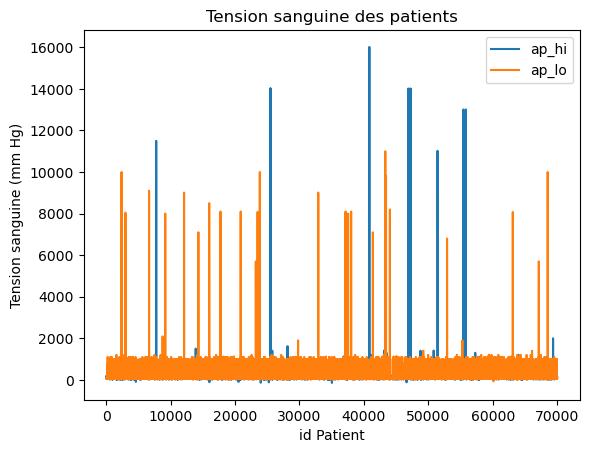

In [14]:
cardio_data[['ap_hi', 'ap_lo']].plot()
plt.title("Tension sanguine des patients")
plt.xlabel("id Patient")
plt.ylabel("Tension sanguine (mm Hg)")

On constate des valeurs bien au-dessus des normales.

### Observation des éléments statistiques des données.

In [15]:
cardio_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Certaines valeurs semblent aberrantes :

- ap_hi : MIN = -150, MAX = 16020,
- ap_lo : MIN = -70, MAX = 11000,

Les MIN ne peuvent pas être négatifs et les MAX sont impossibles.

L'âge minimum est de 29 ans, les tailles inférieures à 120 cm sont suspectes.

La taille supérieure à 2,20 m est suspecte.

### Data Preprocessing

#### Identification des anomalies

In [16]:
cardio_data[cardio_data["height"] > 200]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6486,9223,21220,1,250,86.0,140,100,3,1,0,0,1,1
21628,30894,19054,2,207,78.0,100,70,1,1,0,1,1,0


Une seule personne est plus grande que 2,20 m.

In [17]:
print('{} personnes font moins d\'1,20 m (âge MIN = 29 ans)'.format(cardio_data[cardio_data["height"] < 120]['id'].count()))

52 personnes font moins d'1,20 m (âge MIN = 29 ans)


In [18]:
print('{} personnes ont une tension systolique anormalement haute'.format(cardio_data[cardio_data["ap_hi"] > 200]['id'].count()))
print('{} personnes ont une tension systolique anormalement basse'.format(cardio_data[cardio_data["ap_hi"] <= 0]['id'].count()))
print('{} personnes ont une tension diastolique anormalement haute'.format(cardio_data[cardio_data["ap_lo"] > 200]['id'].count()))
print('{} personnes ont une tension diastoliqye anormalement basse'.format(cardio_data[cardio_data["ap_lo"] <= 0]['id'].count()))

100 personnes ont une tension systolique anormalement haute
7 personnes ont une tension systolique anormalement basse
953 personnes ont une tension diastolique anormalement haute
22 personnes ont une tension diastoliqye anormalement basse


In [19]:
cardio_data.drop(cardio_data[cardio_data["height"] > 220].index, inplace = True)

In [20]:
cardio_data.drop(cardio_data[cardio_data["ap_hi"] > 200].index, inplace = True)

In [21]:
cardio_data.drop(cardio_data[cardio_data["ap_hi"] <= 0].index, inplace = True)

In [22]:
cardio_data.drop(cardio_data[cardio_data["ap_lo"] > 200].index, inplace = True)

In [23]:
cardio_data.drop(cardio_data[cardio_data["ap_lo"] <= 0].index, inplace = True)

On écarte les observations avec des tensions artérielles extrèmes ou erronnées ainsi que l'observation dont la taille dépasse les 2,20 m.

#### Visualisation des données de tension sanguine après modification du dataset

Text(0, 0.5, 'Tension sanguine (mm Hg)')

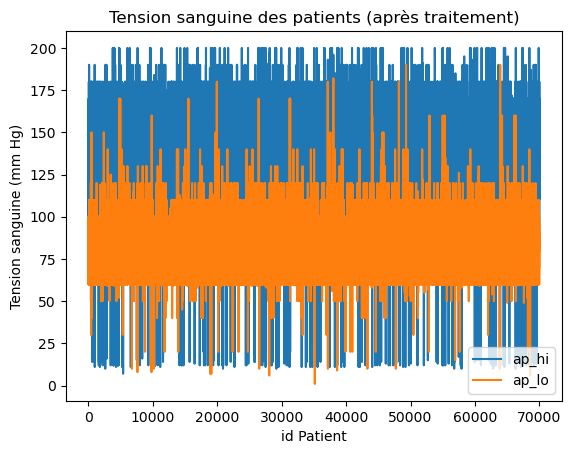

In [24]:
cardio_data[['ap_hi', 'ap_lo']].plot()
plt.title("Tension sanguine des patients (après traitement)")
plt.xlabel("id Patient")
plt.ylabel("Tension sanguine (mm Hg)")

On retrouve des valeurs de tensions cohérentes.

#### Observation des éléments statistiques des données modifiées.

In [25]:
cardio_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68932.000000,68932.000000,68932.000000,68932.000000,68932.000000,68932.000000,68932.000000,68932.000000,68932.000000,68932.000000,68932.000000,68932.000000,68932.000000
mean,49966.698834,19463.152382,1.348517,164.356206,74.109535,126.255440,81.322927,1.364069,1.225759,0.087840,0.053575,0.803270,0.494661
std,28847.983998,2468.517726,0.476504,8.197115,14.321859,17.521873,9.751320,0.678501,0.571742,0.283064,0.225178,0.397529,0.499975
min,0.000000,10798.000000,1.000000,55.000000,11.000000,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24996.750000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50004.500000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74861.250000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,207.000000,200.000000,200.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Il n'apparait plus y avoir d'anomalies.

## 4. Logistic Regression

### Observation de la corrélation entre les séries de données.

Text(0.5, 1.0, 'Matrice de corrélation')

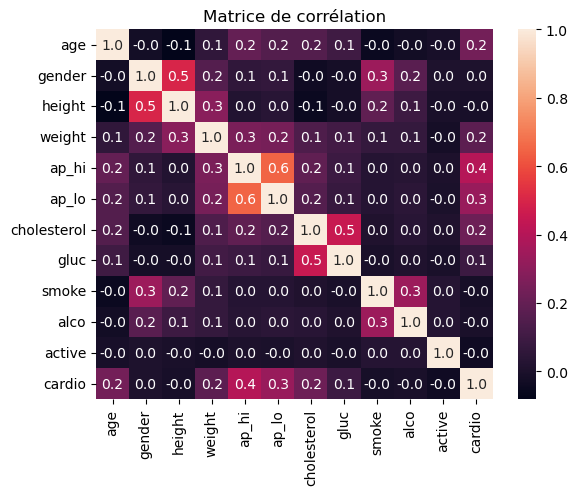

In [26]:
sns.heatmap(cardio_data.drop(columns=['id']).corr(), annot = True, fmt=".1f")
plt.title('Matrice de corrélation')

Certaines corrélations sont évidentes : taille/poids, genre/taille, genre/poids, ...

D'autres sont à observer : age/cholesterol, genre/fumeur, ...

Une partie sont déduites : taille/fumeur, alcool/fumeur,...

Les données qui semblent influencer la maladie cardiaque sont : l'âge, le poids et le cholestérol.

### Préparation du dataset

In [27]:
# Sélection des variables explicatives (tout)
X = cardio_data.drop(columns=['id', 'cardio'])

# Sélection de la variable expliquée (maladie cardiaque)
y = cardio_data[['cardio']]

# Séparation de la donnée en set d'entraînement et de validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Model Training

Avec statsmodel / Logit

In [28]:
model = sm.Logit(y_train, X_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.583422
         Iterations 6


In [29]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.158     
Dependent Variable: cardio           AIC:              64367.6524
Date:               2023-02-17 11:28 BIC:              64465.7473
No. Observations:   55145            Log-Likelihood:   -32173.   
Df Model:           10               LL-Null:          -38220.   
Df Residuals:       55134            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
age           0.0001    0.0000   22.7241  0.0000   0.0001   0.0001
gender        0.3237    0.0228   14.1910  0.0000   0.2790   0.3684
height       -0.0592    0.0008  -78.6329  0.0000  -0.0606  -0.0577
weight        0.0162    0.0007   21.5979  0.0000   0.0147   0.0176
ap_hi         0.0416    0.0009   46.5968  0.0000   0.0399   0.0434
ap_lo         0.0117    0.0014    8.2948  0.0000   0.0089   0.0144
cholesterol   0.4807    0.0170   28.2083  0.0000   0.4473   0.5141
gluc         -0.1352    0.0193   -7.0238  0.0000  -0.1730  -0.0975
smoke        -0.0809    0.0375   -2.1578  0.0309  -0.1544  -0.0074
alco         -0.1648    0.0460   -3.5787  0.0003  -0.2550  -0.0745
active       -0.3087    0.0238  -12.9518  0.0000  -0.3555  -0.2620
=================================================================

"""

### Model Validation

= Predict the test dataset

Avec sklearn / LogisticRegression

In [30]:
#Reshape to use with sklearn
y_train = y_train.to_numpy().reshape(len(y_train),)

In [31]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_valid)

In [32]:
print('Model accuracy (%) : {:.1f}'.format(logreg.score(X_valid, y_valid) * 100))

Model accuracy (%) : 70.0


### Model Evaluation

ROC curve is one of the important evaluation methods.

It plots the true positive rate against the false positive rate.

- If the TPR is closer to 1 that shows that it is a very good model.
- If the TPR is 0.5, it shows that the model is as good as a guess.
- If the TPR is below 0.5, it shows that the model is predicting positive values as negative and negative values as positive. 

In [33]:
roc_auc = roc_auc_score(y_valid, logreg.predict(X_valid))

fpr, tpr, thresholds = roc_curve(y_valid, logreg.predict_proba(X_valid)[:,1])

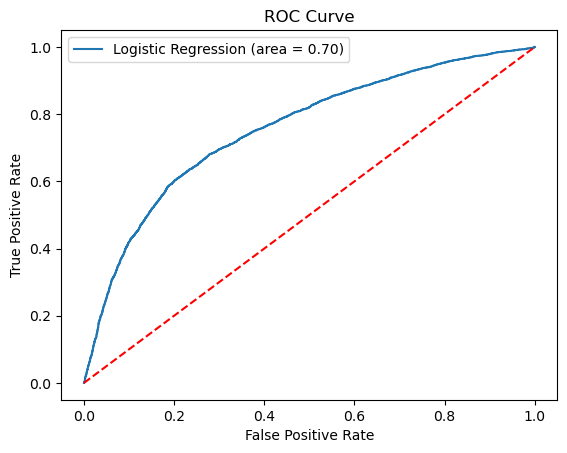

In [34]:
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

## 5. Custom Model

### Custom Model Train

### Custom Model Validation

### Custom Model Evaluation

## Arthur est-il est un sujet à risque cardio-vasculaire ?

Il a 53 ans, fumeur, sportif, 175 cm, 85 kg, avec un taux de cholestérol au dessus de la normale et un taux de glucose normal, une tension artérielle systolique dans la moyenne et une pression sanguine diastolique correspondant à la moyenne du 3e quartile (50%-75%) du jeu de données.

In [35]:
hi_mean = round(np.mean(cardio_data['ap_hi']))

In [36]:
ap_lo_np = cardio_data['ap_lo'].to_numpy()
ap_lo_np.sort()

In [37]:
obs = len(ap_lo_np)

In [38]:
lo_mean_3 = round(np.mean(ap_lo_np[-int(obs/2):][:int(obs/4)]))

In [39]:
X.head(1)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1


In [40]:
arthur = pd.DataFrame([[53 * 365, 2, 175, 85, hi_mean, lo_mean_3, 2, 1, 1, 0, 1], [53 * 365, 2, 175, 85, hi_mean, lo_mean_3, 2, 1, 1, 1, 1]], columns=X.columns)
arthur

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,19345,2,175,85,126,81,2,1,1,0,1
1,19345,2,175,85,126,81,2,1,1,1,1


In [41]:
arthur_pred = logreg.predict(arthur)
arthur_pred

array([0, 0], dtype=int64)

In [42]:
#[18857, 1, 165, 64.0, 130,  70, 3, 1, 0, 0, 0]
val = pd.DataFrame([[18857, 1, 165, 64.0 , 130, 70, 3, 3, 0, 0, 0]], columns=X.columns)
val

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18857,1,165,64.0,130,70,3,3,0,0,0


In [43]:
val_pred = logreg.predict(val)
val_pred

array([0], dtype=int64)